In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\anupa\Documents\Python\ML_resources\Epoch_PS\clustering_data.csv")

C:\Users\anupa\AppData\Local\Temp\ipykernel_9576\1398212182.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\anupa\Documents\Python\ML_resources\Epoch_PS\clustering_data.csv")


In [3]:
df.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157126 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CircleName    157126 non-null  object
 1   RegionName    157073 non-null  object
 2   DivisionName  157124 non-null  object
 3   OfficeName    157126 non-null  object
 4   Pincode       157126 non-null  int64 
 5   OfficeType    157126 non-null  object
 6   Delivery      157126 non-null  object
 7   District      157126 non-null  object
 8   StateName     157126 non-null  object
 9   Latitude      148288 non-null  object
 10  Longitude     148283 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.2+ MB


In [5]:
df.columns

Index(['CircleName', 'RegionName', 'DivisionName', 'OfficeName', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName', 'Latitude',
       'Longitude'],
      dtype='object')

In [6]:
df['StateName'].value_counts()

UTTAR PRADESH                                   17692
MAHARASHTRA                                     12756
TAMIL NADU                                      11795
ANDHRA PRADESH                                  10634
RAJASTHAN                                       10345
KARNATAKA                                        9671
BIHAR                                            9113
GUJARAT                                          8868
WEST BENGAL                                      8775
MADHYA PRADESH                                   8284
ODISHA                                           8270
TELANGANA                                        5816
KERALA                                           5062
CHHATTISGARH                                     4082
ASSAM                                            4011
PUNJAB                                           3838
JHARKHAND                                        3804
HIMACHAL PRADESH                                 2796
UTTARAKHAND                 

In [7]:
df1 = df[df['StateName'] == 'TELANGANA']

In [8]:
df1.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.6845544,78.0773742
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.3096558,77.9466324
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.2108201,78.4853495


## Data Preprocessing and Visualization

In [9]:
df1[(df1['Latitude'].isnull()) & (df1['Longitude'].isnull())]

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
312,Telangana Circle,Hyderabad City Region,Secunderabad Division,Yadgarpalli B.O,501301,BO,Delivery,MEDCHAL MALKAJGIRI,TELANGANA,NaN,NaN
313,Telangana Circle,Hyderabad City Region,Secunderabad Division,Korremal B.O,500088,BO,Delivery,MEDCHAL MALKAJGIRI,TELANGANA,NaN,NaN
314,Telangana Circle,Hyderabad City Region,Secunderabad Division,Pratapsingaram B.O,500088,BO,Delivery,MEDCHAL MALKAJGIRI,TELANGANA,NaN,NaN
315,Telangana Circle,Hyderabad City Region,Secunderabad Division,Pochampally B.O,500100,BO,Delivery,MEDCHAL MALKAJGIRI,TELANGANA,NaN,NaN
316,Telangana Circle,Hyderabad City Region,Secunderabad Division,CMR College B.O,501401,BO,Delivery,MEDCHAL MALKAJGIRI,TELANGANA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
126809,Telangana Circle,Hyderabad City Region,Hyderabad South East Division,Osmannagar S.O,500036,PO,Non Delivery,HYDERABAD,TELANGANA,NaN,NaN
126810,Telangana Circle,Hyderabad City Region,Hyderabad South East Division,Vidyanagar S.O,500044,PO,Non Delivery,HYDERABAD,TELANGANA,NaN,NaN
128405,Telangana Circle,Hyderabad City Region,Hyderabad South East Division,Saradanagar S.O,500070,PO,Non Delivery,RANGA REDDY,TELANGANA,NaN,NaN
131034,Telangana Circle,Hyderabad Region,Hanamkonda Division,Nallabelli S.O,506350,PO,Delivery,WARANGAL RURAL,TELANGANA,NaN,NaN


In [10]:
df1 = df1[df1['Latitude'].notna()]

In [11]:
df1 = df1[df1['Longitude'].notna()]

In [12]:
df1[(df1['Latitude'].isnull()) & (df1['Longitude'].isnull())]

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4281 entries, 138 to 151049
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CircleName    4281 non-null   object
 1   RegionName    4281 non-null   object
 2   DivisionName  4281 non-null   object
 3   OfficeName    4281 non-null   object
 4   Pincode       4281 non-null   int64 
 5   OfficeType    4281 non-null   object
 6   Delivery      4281 non-null   object
 7   District      4281 non-null   object
 8   StateName     4281 non-null   object
 9   Latitude      4281 non-null   object
 10  Longitude     4281 non-null   object
dtypes: int64(1), object(10)
memory usage: 401.3+ KB


In [14]:
df1['Latitude'] = df1['Latitude'].astype(float)
df1['Longitude'] = df1['Longitude'].astype(float)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4281 entries, 138 to 151049
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CircleName    4281 non-null   object 
 1   RegionName    4281 non-null   object 
 2   DivisionName  4281 non-null   object 
 3   OfficeName    4281 non-null   object 
 4   Pincode       4281 non-null   int64  
 5   OfficeType    4281 non-null   object 
 6   Delivery      4281 non-null   object 
 7   District      4281 non-null   object 
 8   StateName     4281 non-null   object 
 9   Latitude      4281 non-null   float64
 10  Longitude     4281 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 401.3+ KB


In [16]:
df1.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.684554,78.077374
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.532992,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.532992,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.309656,77.946632
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.210820,78.485349


In [24]:
df1['Pincode'].duplicated().value_counts()

True     3609
False     672
Name: Pincode, dtype: int64

In [26]:
df1 = df1[~df1['Pincode'].duplicated()]

In [27]:
df1['Pincode'].duplicated().value_counts()

False    672
Name: Pincode, dtype: int64

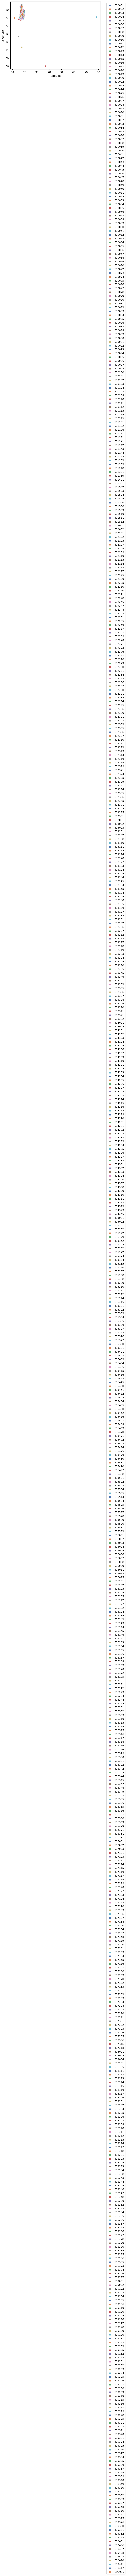

In [37]:
sns.scatterplot(x='Latitude', y='Longitude', data=df1, hue = 'Pincode', palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Clustering Analysis

In [103]:
def initialize_centroids(X, k):
    np.random.seed(23)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels

In [104]:
def calculate_variance(X, labels, centroids):
    variance = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        variance += ((cluster_points - centroids[i])**2).sum()
    return variance

In [105]:
k_values = range(1, 11)  # Testing k from 1 to 10

# Calculate variance for each k value
variance_values = []

for k in k_values:
    centroids, labels = kmeans(data, k)
    variance = calculate_variance(data, labels, centroids)
    variance_values.append(variance)

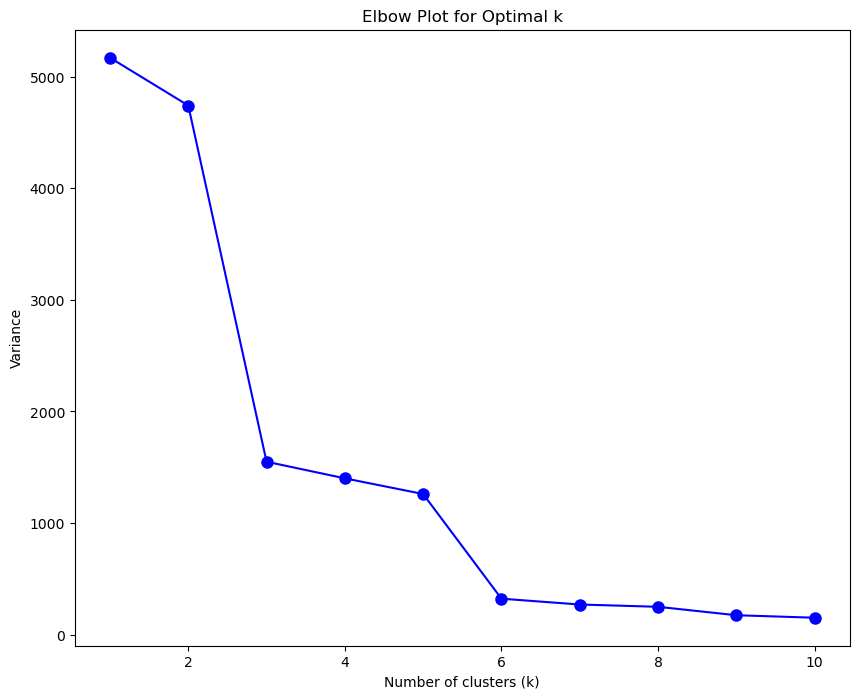

In [106]:
# Plot the elbow plot
plt.figure(figsize=(10, 8))
plt.plot(k_values, variance_values, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Variance')
plt.title('Elbow Plot for Optimal k')
plt.show()

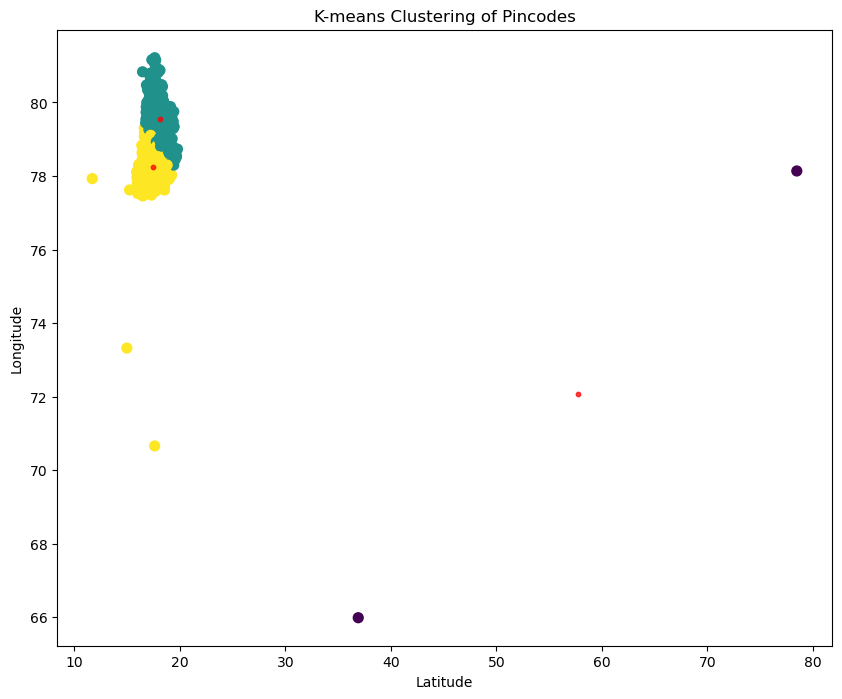

In [107]:
data = df1[['Latitude', 'Longitude']].values

# Number of clusters
k = 3

# Apply k-means clustering
centroids, labels = kmeans(data, k)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')  # Plot Longitude on x-axis and Latitude on y-axis
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10, alpha=0.75)  # Plot centroids
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-means Clustering of Pincodes')
plt.show()

# 3 clusters identified using 3 different colors (yellow, violet, green) with red points depicting the centroid of each cluster.

## Inference and Insights

In [108]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,

In [109]:
cluster1 = df1[labels==0]

In [110]:
cluster2 = df1[labels==1]

In [111]:
cluster3 = df1[labels==2]

In [112]:
cluster1

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,Cluster
11802,Telangana Circle,Hyderabad Region,Hanamkonda Division,Gorlavaid B.O,506168,BO,Delivery,JAYASHANKAR BHUPALAPALLY,TELANGANA,36.896400,65.986900,1
140119,Telangana Circle,Hyderabad City Region,Sangareddy Division,Bdl Bhanur S.O,502305,PO,Delivery,SANGAREDDY,TELANGANA,78.470167,78.136139,1


In [113]:
cluster2

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,Cluster
166,Telangana Circle,Hyderabad Region,Nizamabad Division,Lingupalli B.O,503102,BO,Delivery,KAMAREDDY,TELANGANA,18.412450,78.689513,2
278,Telangana Circle,Hyderabad Region,Peddapalli Division,Gollapalli B.O,505186,BO,Delivery,PEDDAPALLI,TELANGANA,18.467618,79.246768,2
281,Telangana Circle,Hyderabad Region,Peddapalli Division,Gangaram B.O,505153,BO,Delivery,PEDDAPALLI,TELANGANA,18.463131,79.506620,2
283,Telangana Circle,Hyderabad Region,Peddapalli Division,Moolasala B.O,505162,BO,Delivery,PEDDAPALLI,TELANGANA,18.545130,79.428861,2
285,Telangana Circle,Hyderabad Region,Peddapalli Division,Madaka B.O,505152,BO,Delivery,PEDDAPALLI,TELANGANA,18.424491,79.430915,2
...,...,...,...,...,...,...,...,...,...,...,...,...
149348,Telangana Circle,Hyderabad Region,Khammam Division,Gouthampur S.O,507138,PO,Delivery,BHADRADRI KOTHAGUDEM,TELANGANA,17.675139,80.776250,2
149678,Telangana Circle,Hyderabad Region,Khammam Division,Rudrampur S.O,507119,PO,Delivery,BHADRADRI KOTHAGUDEM,TELANGANA,17.484417,80.651417,2
149969,Telangana Circle,Hyderabad City Region,Medak Division,Ibrahimnagar S.O,502267,PO,Delivery,SIDDIPET,TELANGANA,18.150028,78.941694,2
149971,Telangana Circle,Hyderabad City Region,Medak Division,Palamakula S.O,502375,PO,Delivery,SIDDIPET,TELANGANA,18.093222,78.961944,2


In [114]:
cluster3

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,Cluster
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.684554,78.077374,0
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.532992,77.618717,0
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.309656,77.946632,0
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.210820,78.485349,0
143,Telangana Circle,Hyderabad Region,Nizamabad Division,Malkapur B.O,503125,BO,Delivery,KAMAREDDY,TELANGANA,18.212713,78.549741,0
...,...,...,...,...,...,...,...,...,...,...,...,...
150220,Telangana Circle,Hyderabad City Region,Medak Division,Tekmal S.O,502302,PO,Delivery,MEDAK,TELANGANA,17.973333,78.035222,0
151046,Telangana Circle,Hyderabad City Region,Medak Division,Makkarajpet S.O,502247,PO,Delivery,MEDAK,TELANGANA,17.949361,78.520056,0
151047,Telangana Circle,Hyderabad City Region,Medak Division,Rajpally S.O,502117,PO,Delivery,MEDAK,TELANGANA,18.019889,78.294944,0
151048,Telangana Circle,Hyderabad City Region,Medak Division,Toopran S.O,502334,PO,Delivery,MEDAK,TELANGANA,17.905167,78.461083,0


In [115]:
cluster1.columns

Index(['CircleName', 'RegionName', 'DivisionName', 'OfficeName', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName', 'Latitude',
       'Longitude', 'Cluster'],
      dtype='object')

In [116]:
cluster1['CircleName'].value_counts()

Telangana Circle    2
Name: CircleName, dtype: int64

In [117]:
cluster2['CircleName'].value_counts()

Telangana Circle    309
Name: CircleName, dtype: int64

In [118]:
cluster3['CircleName'].value_counts()

Telangana Circle    360
Tamilnadu Circle      1
Name: CircleName, dtype: int64

In [119]:
cluster1['DivisionName'].value_counts()

Hanamkonda Division    1
Sangareddy Division    1
Name: DivisionName, dtype: int64

In [120]:
cluster2['DivisionName'].value_counts()

Khammam Division           55
Adilabad Division          46
Karimnagar Division        42
Peddapalli Division        39
Hanamkonda Division        38
Warangal Division          35
Suryapet Division          26
Nalgonda Division           8
Nizamabad Division          7
Medak Division              7
Secunderabad Division       4
Hyderabad City Division     1
Wanaparthy Division         1
Name: DivisionName, dtype: int64

In [121]:
cluster3['DivisionName'].value_counts()

Secunderabad Division            52
Hyderabad South East Division    47
Nizamabad Division               46
Sangareddy Division              40
Wanaparthy Division              38
Mahabubnagar Division            37
Hyderabad City Division          32
Medak Division                   29
Nalgonda Division                25
Hanamkonda Division               6
Adilabad Division                 5
Karimnagar Division               2
Salem West Division               1
Suryapet Division                 1
Name: DivisionName, dtype: int64

In [122]:
cluster1['OfficeType'].value_counts()

BO    1
PO    1
Name: OfficeType, dtype: int64

In [123]:
cluster2['OfficeType'].value_counts()

BO    234
PO     62
HO     13
Name: OfficeType, dtype: int64

In [124]:
cluster3['OfficeType'].value_counts()

PO    227
BO    117
HO     17
Name: OfficeType, dtype: int64

In [125]:
cluster1['Delivery'].value_counts()

Delivery    2
Name: Delivery, dtype: int64

In [126]:
cluster2['Delivery'].value_counts()

Delivery        298
Non Delivery     11
Name: Delivery, dtype: int64

In [127]:
cluster3['Delivery'].value_counts()

Delivery        334
Non Delivery     27
Name: Delivery, dtype: int64

In [128]:
cluster1['District'].value_counts()

JAYASHANKAR BHUPALAPALLY    1
SANGAREDDY                  1
Name: District, dtype: int64

In [129]:
cluster2['District'].value_counts()

KHAMMAM                     29
WARANGAL URBAN              25
BHADRADRI KOTHAGUDEM        23
KARIMNAGAR                  23
PEDDAPALLI                  20
MANCHERIAL                  19
Jagitial                    18
MAHABUBABAD                 17
SURYAPET                    15
NALGONDA                    14
WARANGAL RURAL              13
SIDDIPET                    13
JANGOAN                     11
ADILABAD                    10
KUMURAM BHEEM ASIFABAD       9
RAJANNA SIRCILLA             9
JAYASHANKAR BHUPALAPALLY     8
Nirmal                       8
Mulugu                       7
NIZAMABAD                    6
YADADRI BHUVANAGIRI          5
MEDCHAL MALKAJGIRI           2
HYDERABAD                    2
KAMAREDDY                    1
RANGA REDDY                  1
NAGARKURNOOL                 1
Name: District, dtype: int64

In [130]:
cluster3['District'].value_counts()

HYDERABAD              53
RANGA REDDY            47
SANGAREDDY             35
MEDCHAL MALKAJGIRI     28
NIZAMABAD              26
MEDAK                  24
KAMAREDDY              21
NAGARKURNOOL           17
VIKARABAD              16
NALGONDA               14
MAHABUBNAGAR           13
Narayanpet             12
SIDDIPET               12
YADADRI BHUVANAGIRI    11
JOGULAMBA GADWAL       10
WANAPARTHY             10
Nirmal                  5
JANGOAN                 3
RAJANNA SIRCILLA        2
WARANGAL RURAL          1
SURYAPET                1
Name: District, dtype: int64

In [131]:
cluster1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pincode,2.0,504236.500000,2731.553496,502305.0000,503270.750000,504236.500000,505202.250000,506168.000000
Latitude,2.0,57.683283,29.397092,36.8964,47.289842,57.683283,68.076725,78.470167
Longitude,2.0,72.061519,8.590809,65.9869,69.024210,72.061519,75.098829,78.136139
Cluster,2.0,1.000000,0.000000,1.0000,1.000000,1.000000,1.000000,1.000000


In [132]:
cluster2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pincode,309.0,505841.627832,1567.546230,500040.000000,505185.000000,506009.000000,507120.000000,509360.000000
Latitude,309.0,18.076888,0.720466,16.450167,17.485850,18.062805,18.683614,19.764729
Longitude,309.0,79.545720,0.616877,78.296017,79.134343,79.496583,79.913657,81.216068
Cluster,309.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [133]:
cluster3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pincode,361.0,505041.318560,26365.354872,500001.000000,500098.000000,502310.000000,508244.000000,999999.000000
Latitude,361.0,17.436448,0.743422,11.683720,17.091222,17.440028,17.836861,19.191069
Longitude,361.0,78.255707,0.612387,70.658972,77.994250,78.328488,78.520056,79.304300
Cluster,361.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


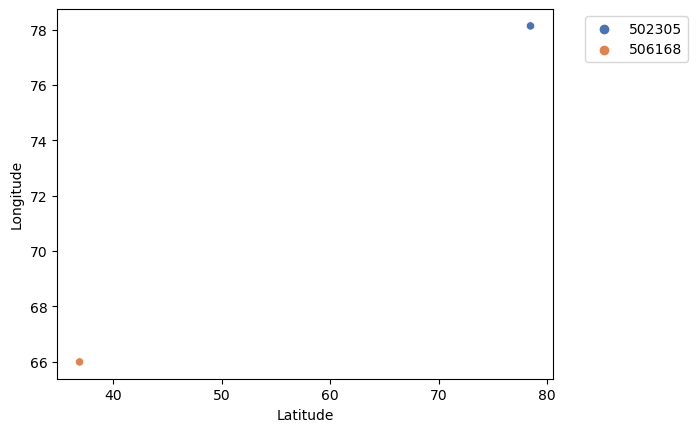

In [134]:
sns.scatterplot(x='Latitude', y='Longitude', data=cluster1, hue = 'Pincode', palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

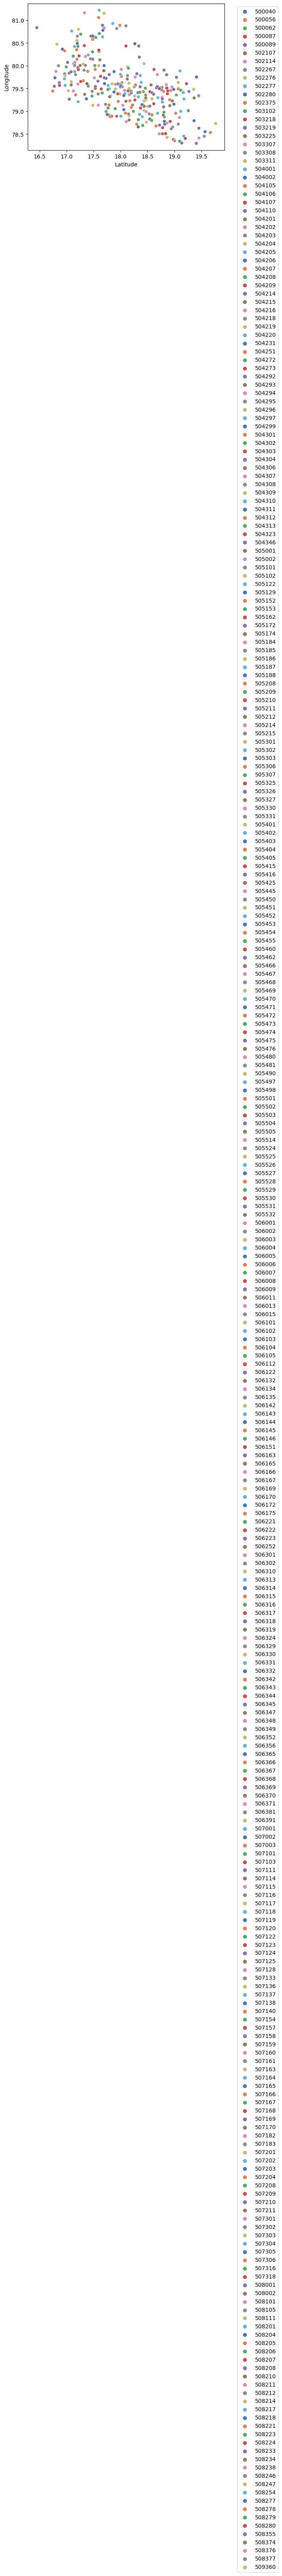

In [135]:
sns.scatterplot(x='Latitude', y='Longitude', data=cluster2, hue = 'Pincode', palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

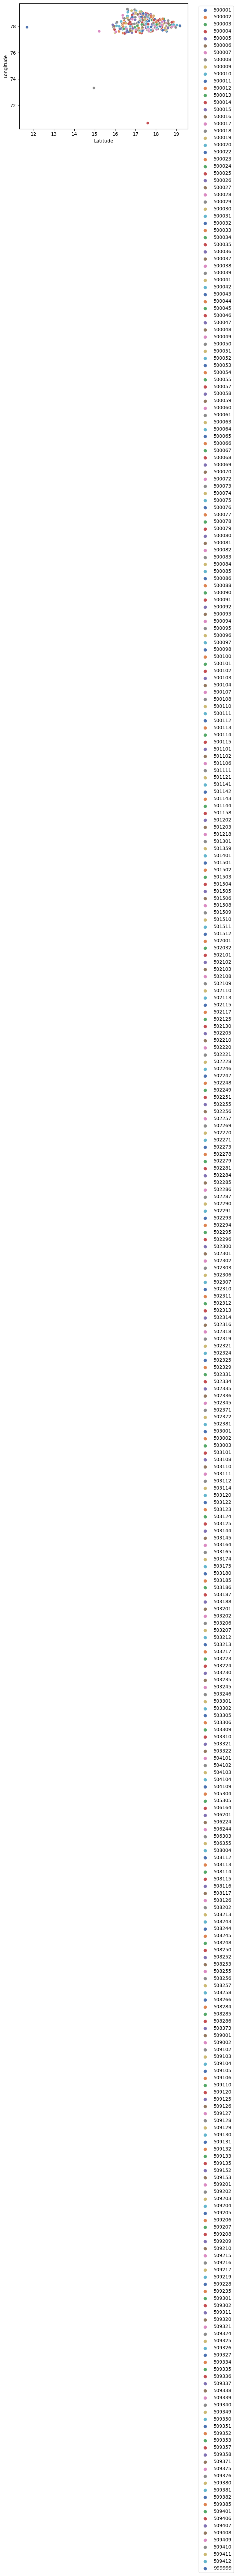

In [136]:
sns.scatterplot(x='Latitude', y='Longitude', data=cluster3, hue = 'Pincode', palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [137]:
cluster1.corr()

C:\Users\anupa\AppData\Local\Temp\ipykernel_9576\4212051379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster1.corr()


,Pincode,Latitude,Longitude,Cluster
Pincode,1.0,-1.0,-1.0,NaN
Latitude,-1.0,1.0,1.0,NaN
Longitude,-1.0,1.0,1.0,NaN
Cluster,NaN,NaN,NaN,NaN


In [138]:
cluster2.corr()

C:\Users\anupa\AppData\Local\Temp\ipykernel_9576\77439491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster2.corr()


,Pincode,Latitude,Longitude,Cluster
Pincode,1.000000,-0.664208,0.53638,NaN
Latitude,-0.664208,1.000000,-0.59745,NaN
Longitude,0.536380,-0.597450,1.00000,NaN
Cluster,NaN,NaN,NaN,NaN


In [139]:
cluster3.corr()

C:\Users\anupa\AppData\Local\Temp\ipykernel_9576\1800479087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster3.corr()


,Pincode,Latitude,Longitude,Cluster
Pincode,1.000000,-0.471070,-0.040447,NaN
Latitude,-0.471070,1.000000,0.090353,NaN
Longitude,-0.040447,0.090353,1.000000,NaN
Cluster,NaN,NaN,NaN,NaN


### Inferences

1. By implementing K-means clustering from scratch, and using elbow plot to determine best value for k, we group the Pincodes in Telangana into 3 clusters, with 2 values in cluster 1, 309 in second and 361 values in third cluster

2. On further plottting distribution of pincodes in each obtained cluster; it is noticed that position of Pincodes in cluster 3 are localized, while in cluster 2 are more distributed over the entire plot

3. Hanamkonda Division is found in column 'Division Name' in all 3 clusters

4. In cluster 3, office type in majority is 'PO', while in cluster 2, 'BO' has more value counts. In cluster 1, there is one 'BO' type and one 'PO' type.